# SLT-CE-2: Deterministic Annealing

legi 22-943-914

### References

<ol>
<li> Sections II.A.1 (principled derivation of deterministic annealing) and II.A.3 (Mass-constrained clustering) of 'Deterministic annealing for clustering, compression, classification, regression, and related optimization problems', Kenneth Rose, 1998, http://ieeexplore.ieee.org/document/726788/ 
</li>

<li>
The wine data set, http://www3.dsi.uminho.pt/pcortez/wine5.pdf
</li>
    
</ol>

### Setup 

In [1]:
import sklearn as skl
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import sklearn.svm as svm
from sklearn import cluster

import pandas as pd
import numpy as np
from treelib import Tree

import matplotlib.pyplot as plt
from matplotlib import cm

<h2 style="background-color:#f0b375;">
Section 4.0
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 4.0 </span>
</h2>

<p style="background-color:#adebad;">
    For this exercise, it is of utmost importance to read reference [1] about deterministic annealing clustering (DAC). Our implementation will be based on this reference. Please shortly summarize what they refer to as the <i>preferred implementation</i> of the DAC algorithm.
</p>

Core idea of preferred implementation: when critical temperature is reached for a cluster j, then add a codevector until reaching the maximum number of codevectors. At the same time, half the cluster probability.

<p style="background-color:#adebad;">
    In order to avoid headaches with numerical instabilities, we first try our algorithm on a simple artificially generated data as below. Run the bloc below to have a look at the data. Later when we have everything implemented, we will examine some real world data. 
</p>

Text(0.5, 1.0, 'Test data')

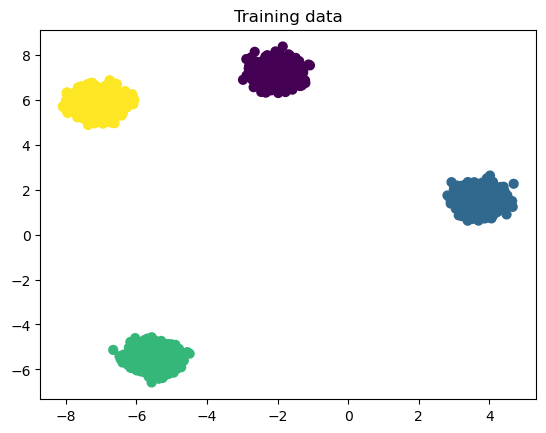

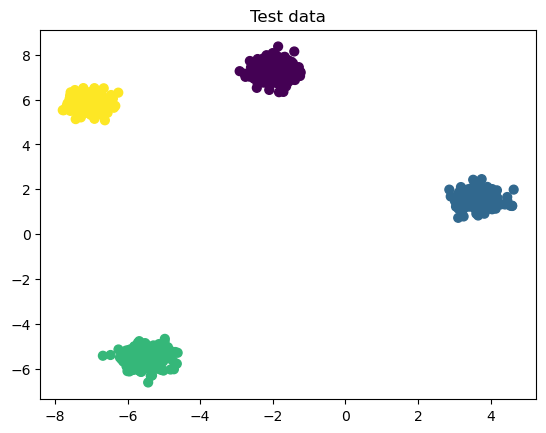

In [2]:
n_clusters = 4
ran_s = 42

# Generate artificial dataset
X, y_true = make_blobs(n_samples=7000, centers=4,
                       cluster_std=0.3, random_state=ran_s,
                       center_box=(-8.0, 8.0),
                       shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_true, train_size=6000, random_state=42)

plt.figure()                    
                    # critical temperature
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap='viridis')
plt.title("Training data")

plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap='viridis')
plt.title("Test data")

<p style="background-color:#adebad;">
    Implement the <b>fit method</b> for the template class DeterministicAnnealing, according to the contract outlined in its docstring. (The template class DeterministicAnnealing is in file <b>DA.py</b> which you can open in your favourite IDE) For the implementation, it may help to take a look at both <b>get_distance method</b> and <b>fit _calculate_cluster_probs method</b> and implement them as well. Of course you are free to change all these methods or/and write additional methods for your purpose.
    You can add more class methods as necessary.
    See http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html for complementary information.
</p>
<p style="background-color:#adebad;">
    While implementing, you can run the bloc below to test your implementation.
</p>

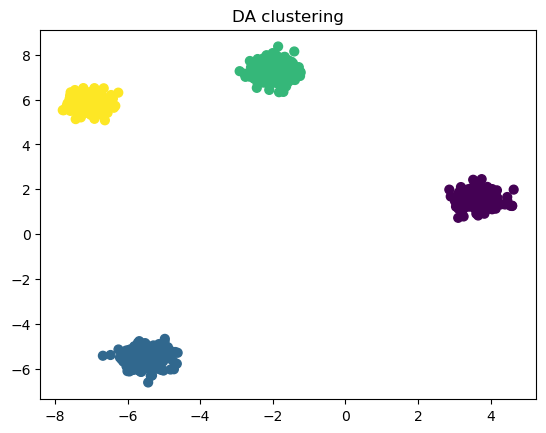

In [3]:
from DA import DeterministicAnnealingClustering

DAC = DeterministicAnnealingClustering(
    n_clusters=n_clusters, random_state=ran_s)
DAC.fit(X_train)
y_DAC = DAC.predict(X_test)
y_DAC_hard = np.argmax(y_DAC, axis=1)
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_DAC_hard, s=40, cmap='viridis')
plt.title("DA clustering")
plt.show()

<h2 style="background-color:#f0b375;">
Section 4.5
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points. Note that you can have a maximum of 6 points at the end.</span>
</h2>

<p style="background-color:#adebad;">
    In this section we implement a plot which will help us better understand the DA method, and could also be a help for better debugging of your implementation.
    
 <ul style="background-color:#adebad;">
        <li> 
            Modify your implementation of <b>fit</b> function such that <b>plot_phase_diagram</b> method will produce a plot similar to the phase diagram plot shown in Figure 2 of the reference paper.
        </li>
</ul>  
</p>

<ul style="background-color:#adebad;">
            For this, extend DAC.fit to save the expected distortion during annealing as an additional attribute self.distortion.
            You might also want to save the number of effective clusters and the temperature along the way.
    </ul>
</p>

#### extend DAC.fit(self, X):
    # ...
    # Save information for each (n-th) annealing step:
    # self.distortion = [d0, d1, d2, ...]
    # self.n_eff_clusters = [e0, e1, e2, ...]
    # self.temp = [t0, t1, t2, ...]
    # ...

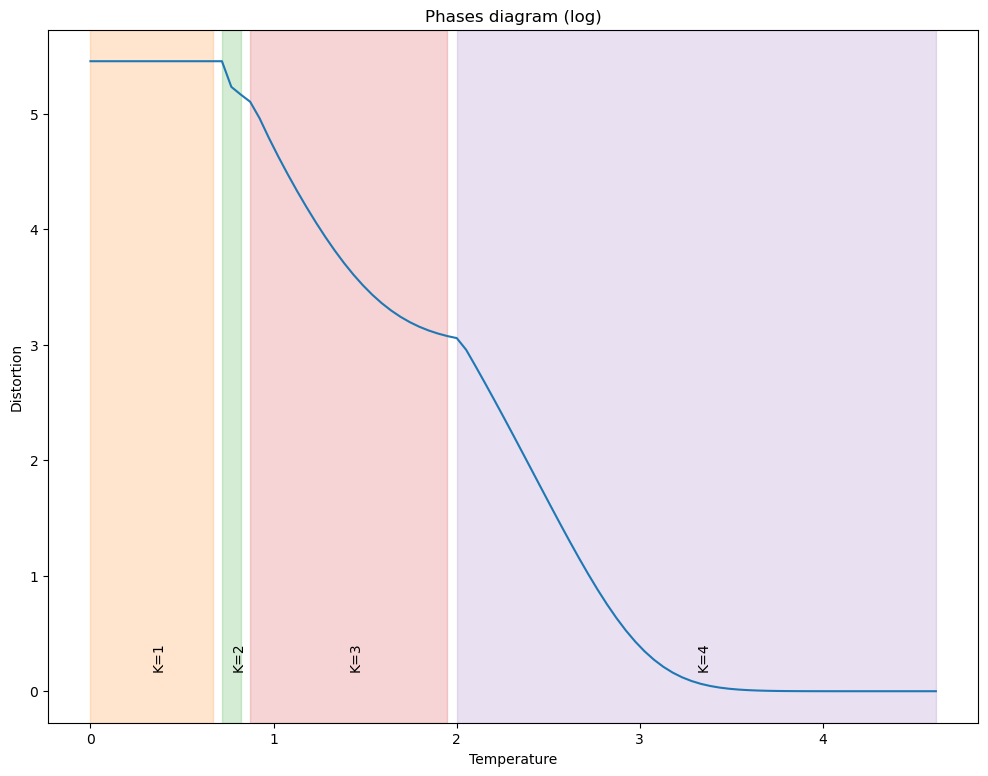

In [4]:

DAC.plot_phase_diagram()

<h2 style="background-color:#f0b375;">
Section 5.0
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>
<ul style="background-color:#adebad;">
Here we implement another plot which helps better undetrstad the dynamics of the algorithm.
        <li>
        Implement DAC.plot_bifurcation, which should create a bifurcation plot.<br>
        Modify DAC.fit to keep track of the distances, using the tree object DAC.bifurcation_tree. When a cluster splits, it creates two child nodes. Each node should store its centroid vector, and the distance to the parent centroid vector. After splitting, the parent node is not updated anymore.<br>
        In the bifurcation plot, the horizontal distance of a child node to its parent node should be exactly the distance to the parent centroid vector. The two child nodes should move in opposite directions, i.e. one to the left of the parent and one to the right.
        </li>
</ul>

This section could bit a bit annoying, you can also jump to the next sections and come back here later. 

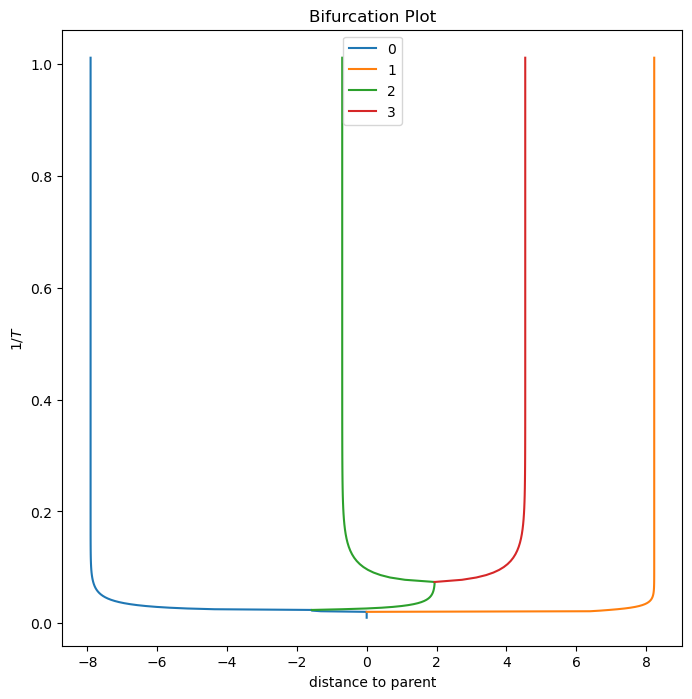

In [5]:
DAC.plot_bifurcation()

<h2 style="background-color:#f0b375;">
Section 5.5
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>

<p style="background-color:#adebad;">
Now we are ready to use some real world data. This might need some tweaking and handling of numberical instabilities. Please make sure your understand the data.
</p>

<p style="background-color:#adebad;">
Read the wine data [3], which contains 11 physiochemical attributes, and two labels (quality and color).
</p>

<p style="background-color:#adebad;">
    Create an instance of your DAC class with n_clusters = 2 and <b>fit the first 6000 samples</b> of the wine data set. Record the execution time. Furthermore, create an instance of the sklearn k-means class, and fit it with the same parameters. Again record the execution time. Make sure that the hyper parameters (initial temperature, min temperature, convergence criteria, noise, etc.) make sense and lead to a reasonable clustering
</p>

In [6]:
from DA import read_data_csv
X, y = read_data_csv("wine-data.csv", y_names=["quality", "color"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y["color"], train_size=6000, random_state=42)

In [7]:
%%time
DAC = DeterministicAnnealingClustering(n_clusters=2, random_state=42)
DAC.fit(X_train)

CPU times: user 32.8 s, sys: 116 ms, total: 33 s
Wall time: 33 s


DeterministicAnnealingClustering(n_clusters=2)

In [8]:
%%time
kmeans = cluster.KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_train)

/home/jiaqing/anaconda3/envs/slt-ce/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: user 4.76 s, sys: 244 ms, total: 5 s
Wall time: 492 ms


KMeans(n_clusters=2, random_state=42)

In [9]:
%%time
y_kmeans = kmeans.predict(X_test)

CPU times: user 3.71 ms, sys: 3.91 ms, total: 7.61 ms
Wall time: 5.78 ms


In [10]:
%%time
y_DAC = DAC.predict(X_test)

CPU times: user 4.04 ms, sys: 0 ns, total: 4.04 ms
Wall time: 1.68 ms


<h2 style="background-color:#f0b375;">
Section 6.0
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>
<ul style="background-color:#adebad;">
<li> Before we can compute the confusion matrix, we need to perform some post-processing on the DAC cluster assignments.
    Explain what the function postprocess (defined below) does, and why we need it. To do so, complete the docstring of the function postprocess.
        </li>
</ul>

In [11]:
def postprocess(y_DAC, y_kmeans):
    """TODO: Add explanation"""
    
    y_DAC_hard = np.argmax(y_DAC, axis=1)
    
    n_clusters = len(np.unique(y_DAC_hard))
    dac2kmeans = []
    for cluster in range(n_clusters):
        argmax = np.argmax(y_DAC[:, cluster])
        dac2kmeans.append(y_kmeans[argmax])
        
    y_DAC_new = []
    for dac_label in y_DAC_hard:
        y_DAC_new.append(dac2kmeans[dac_label])
        
    return np.array(y_DAC_new)

In [12]:
skl.metrics.confusion_matrix(y_kmeans, postprocess(y_DAC, y_kmeans))

array([[287,   1],
       [  0, 209]])

</h2>

<ul style="background-color:#adebad;">
        <li> Read the docstring of <b>transform method</b> and understand what it does.
        </li>
        <li>
        Use DAC.transform and kmeans.transform to transform both, X_train and X_test. 
        </li>
       
</ul>

In [13]:
X_train_DAC = DAC.transform(X_train)
X_test_DAC = DAC.transform(X_test)

X_train_kmeans = kmeans.transform(X_train)
X_test_kmeans = kmeans.transform(X_test)

<ul style="background-color:#adebad;">
        <li>
        Fit an SVM classifier with default parameters to the untransformed data, and to the transformed data.
        Compare the performance of predicting whether the color of a wine is red or white.
        </li>
    </ul>

In [14]:
_svm = svm.SVC(random_state=42)
_svm.fit(X_train, y_train)
_svm.score(X_test, y_test)

/home/jiaqing/anaconda3/envs/slt-ce/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9275653923541247

In [15]:
svm_DAC = svm.SVC(random_state=42)
svm_DAC.fit(X_train_DAC, y_train)
svm_DAC.score(X_test_DAC, y_test)

/home/jiaqing/anaconda3/envs/slt-ce/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9134808853118712

In [16]:
svm_2 = svm.SVC(random_state=42)
svm_2.fit(X_train_kmeans, y_train)
svm_2.score(X_test_kmeans, y_test)

/home/jiaqing/anaconda3/envs/slt-ce/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9134808853118712

<ul style="background-color:#adebad;">
        <li>
        Produce two scatter plots, one for X_train_DAC and one for X_train_kmeans.<br>
        Make the marker color indicate the wine color.
        </li>
    </ul>

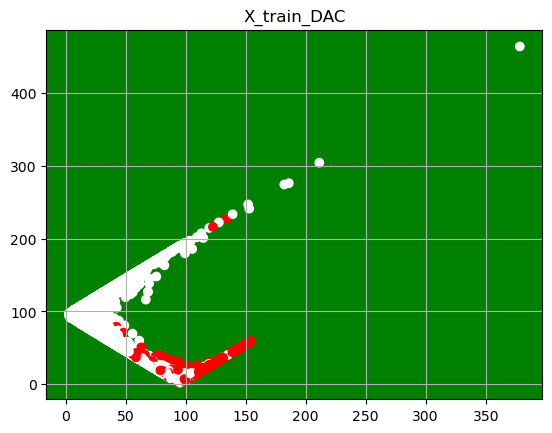

In [17]:
fig, ax = plt.subplots()
ax.scatter(X_train_DAC[:, 1], X_train_DAC[:, 0], c= np.ravel(y_train),label=np.ravel(y_train))
ax.set_facecolor('green')
ax.set_title('X_train_DAC')
ax.grid(True)
plt.show()

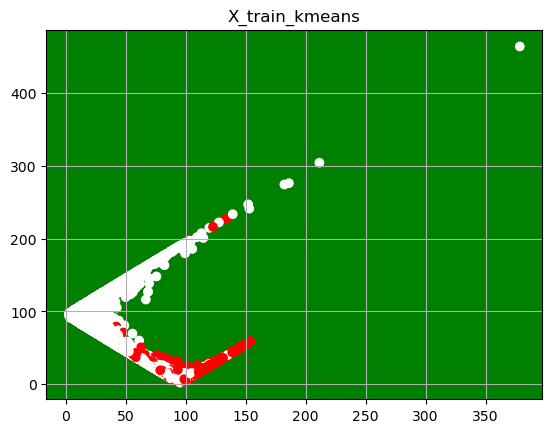

In [18]:
fig, ax = plt.subplots()
ax.scatter(X_train_kmeans[:, 0], X_train_kmeans[:, 1], c= np.ravel(y_train))

ax.set_facecolor('green')
ax.set_title('X_train_kmeans')
ax.grid(True)
plt.show()


<ul style="background-color:#adebad;">
    <li>
        Create a fixed 2D embedding (e.g. with LLE, t-SNE, MDS) of the wine data and color the markers according to quality and color. Fit and transform X_train with DAC(n_clusters=2,3,4,5,6,7,8,...). Produce a plot of the SVM score svm_DAC.score(X_test_DAC, y_test) as a function of n_clusters.. Each time use marker shapes to display the cluster memberships, and compare to the labels color and quality.
    </li>
</ul>

In [19]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

CPU times: user 8min 43s, sys: 10.6 s, total: 8min 53s
Wall time: 41.7 s


In [20]:
%%time
_y = y["color"].flatten()
_y[_y=='white'] = "b"

CPU times: user 255 µs, sys: 5 µs, total: 260 µs
Wall time: 250 µs


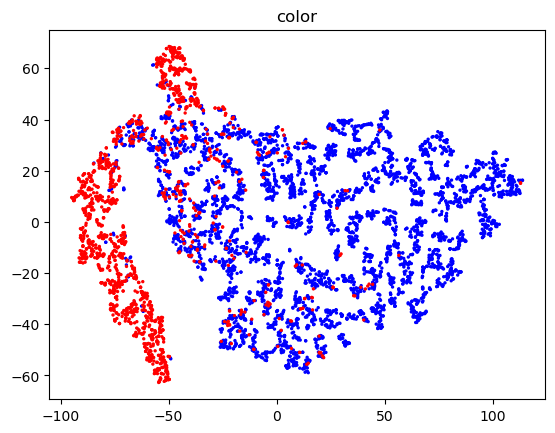

In [21]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=_y, s=2)
plt.title("color")
plt.show()

/tmp/ipykernel_460089/819079107.py:5: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(m)


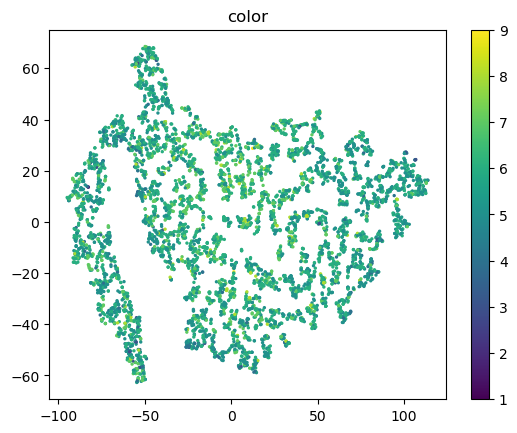

In [22]:
_y_quality=y["quality"].flatten()
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=_y_quality, s=2)
m = cm.ScalarMappable()
m.set_array(_y_quality)
plt.colorbar(m)
plt.title("color")
plt.show()

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state=42)
X_test_tsne= tsne.fit_transform(X_test)

In [24]:
_y_test = y_test.copy().flatten() 
_y_test[_y_test == 'white'] = 'b'

In [25]:
markers = ["8", "s", "v", "^", "p", "*", "D", "x"]
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X, y["quality"], train_size=6000, random_state=42)


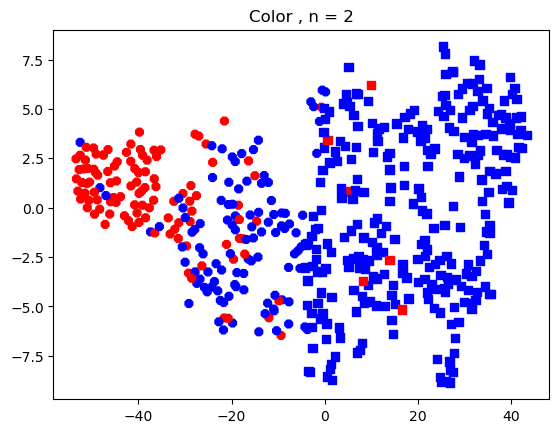

/tmp/ipykernel_460089/2806794747.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(m)


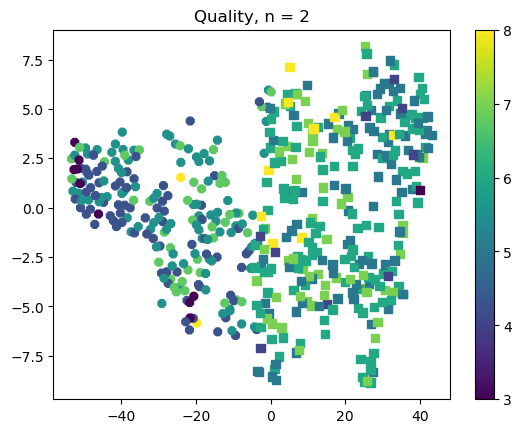

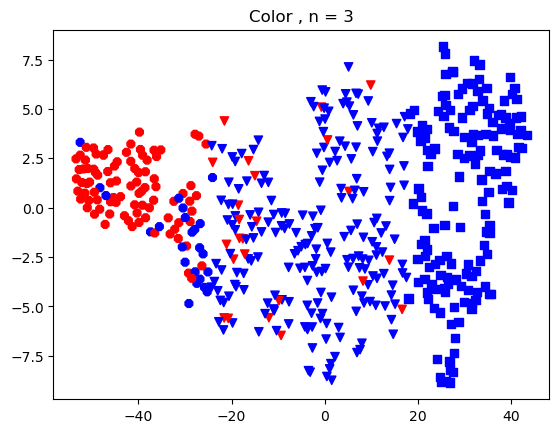

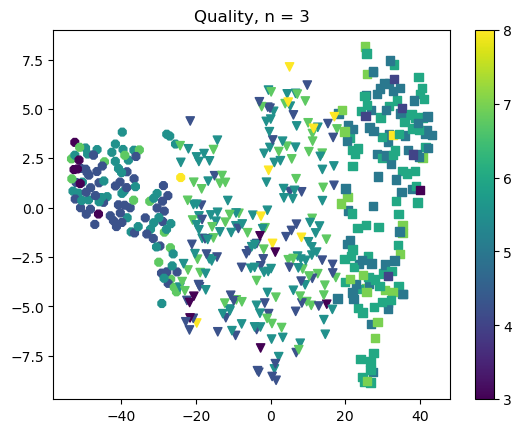

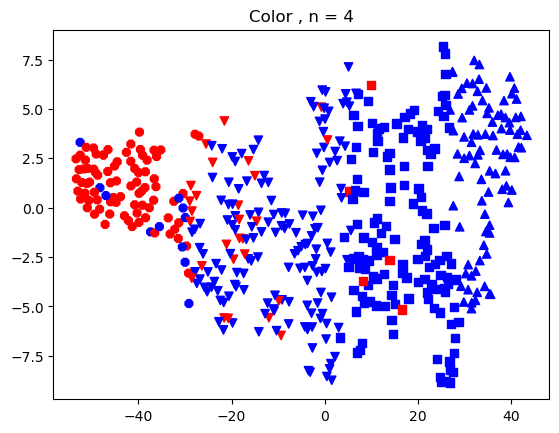

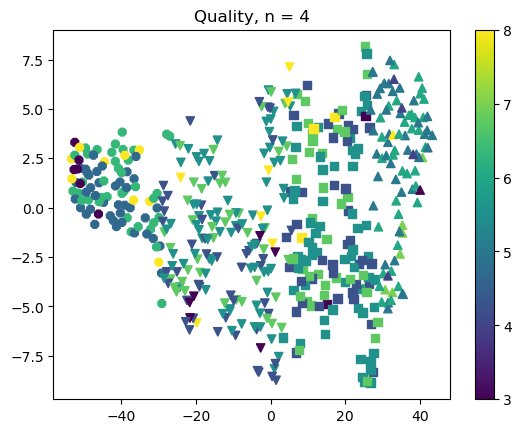

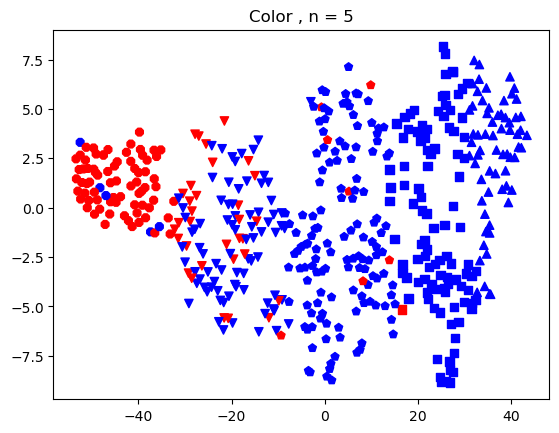

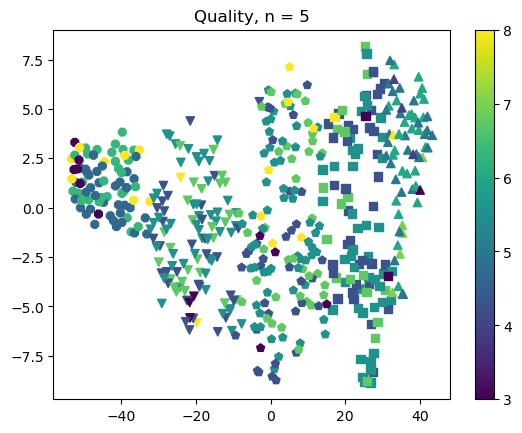

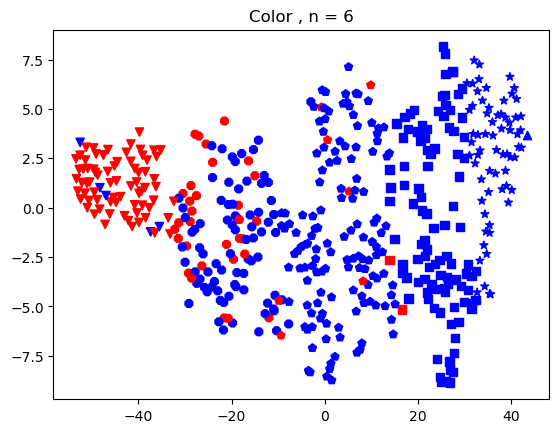

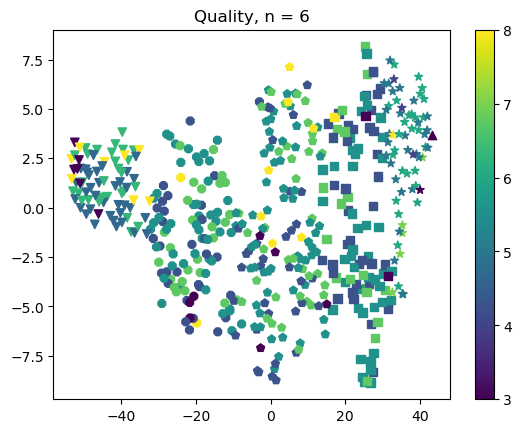

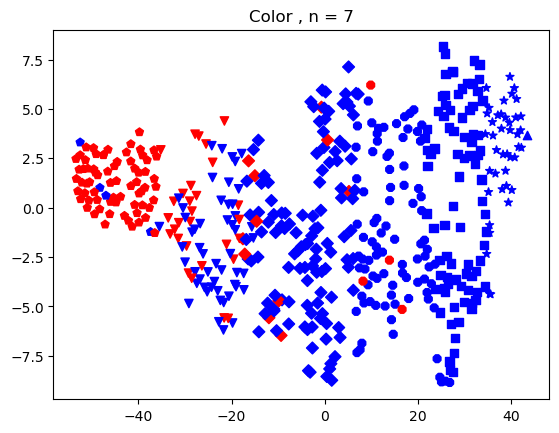

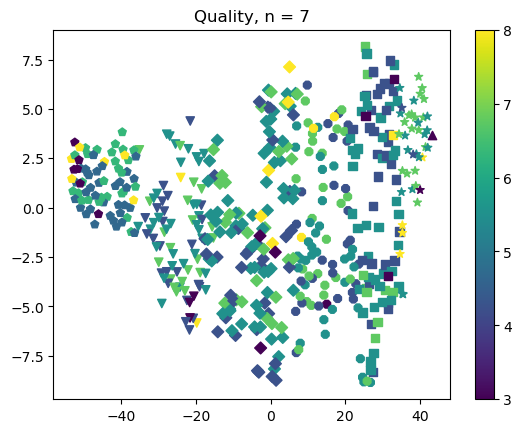

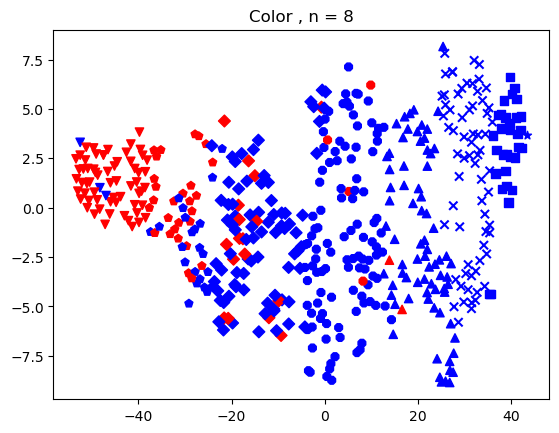

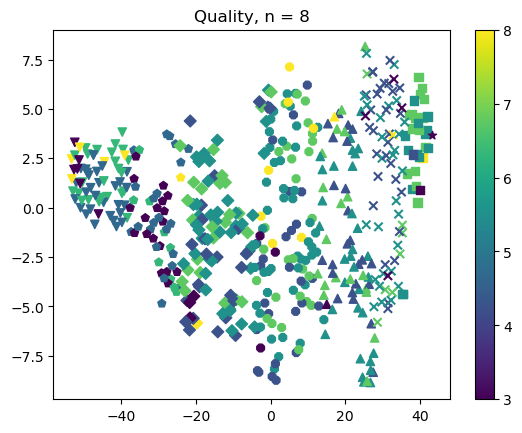

In [26]:
for i in range(2,9):
    DAC = DeterministicAnnealingClustering(n_clusters=i, random_state=42).fit(X_train)
    y_DAC = DAC.predict(X_test)

    fig, ax = plt.subplots()
    for k in range(i):
        ax.scatter(X_test_tsne[:,0][np.argmax(y_DAC, axis=1) == k], X_test_tsne[:,1][np.argmax(y_DAC, axis=1) == k], \
                   c=_y_test[np.argmax(y_DAC, axis=1) == k], marker=markers[k])
    plt.title("Color , n = " + str(i))
    plt.show()

    fig, ax = plt.subplots()
    for k in range(i):
        ax.scatter(X_test_tsne[:,0][np.argmax(y_DAC, axis=1) == k], X_test_tsne[:,1][np.argmax(y_DAC, axis=1) == k], \
                   c=y_test_q.flatten()[np.argmax(y_DAC, axis=1) == k], marker=markers[k])
    plt.title("Quality, n = " + str(i))
    m = cm.ScalarMappable()
    m.set_array(y_test_q)
    plt.colorbar(m)
    plt.show()

n_clusters:2, score:0.9134808853118712
n_clusters:3, score:0.9134808853118712
n_clusters:4, score:0.9134808853118712
n_clusters:5, score:0.9134808853118712
n_clusters:6, score:0.9154929577464789
n_clusters:7, score:0.9114688128772636
n_clusters:8, score:0.9175050301810865


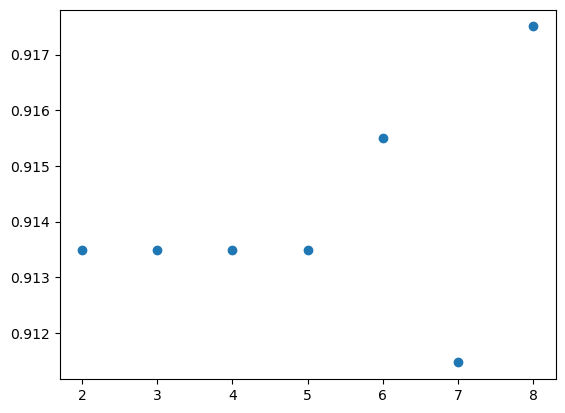

In [27]:
scores = []
n_clusters = []

for i in range(2,9):
    DAC = DeterministicAnnealingClustering(n_clusters=i, random_state=42).fit(X_train)
    svm_DAC = svm.SVC(random_state=42).fit(DAC.transform(X_train), np.ravel(y_train))
    score = svm_DAC.score(DAC.transform(X_test), np.ravel(y_test))
    scores.append(score)
    n_clusters.append(i)
    print('n_clusters:{}, score:{}'.format(i, score))

plt.scatter(n_clusters, scores)
plt.show()

<ul style="background-color:#adebad;">
        <li>
            So far, our implementation of DAC assumed that our data is compatible with the euclidian metric. Argue why this assumption is not justified for the wine-data. Suggest a better alternative (no implementation required!).
        </li>
    </ul>
</p>



## Since the features cannot be compared under the same scale. Some features contribute only a little to the euclidean distance from the clusters. A better alternative might be using "ratio scale".